In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/Users/venuchannarayappa/Desktop/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
X = df.drop(columns = ['expenses'], axis = 1)

In [6]:
X.head() # every feature except expenses

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [7]:
y = df['expenses']

In [8]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [9]:
X['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1338, 11)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [15]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, pred)
    return mae, rmse, r2_square

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)
    
    print('Model performance for Test set of : {}'.format(list(models.keys())[i]))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    

Model performance for Test set of : Linear Regression
- Root Mean Squared Error: 5782.8109
- Mean Absolute Error: 4008.5679
- R2 Score: 0.7846
Model performance for Test set of : Lasso
- Root Mean Squared Error: 5797.2951
- Mean Absolute Error: 4182.3918
- R2 Score: 0.7835
Model performance for Test set of : Ridge
- Root Mean Squared Error: 5798.5673
- Mean Absolute Error: 4187.2631
- R2 Score: 0.7834
Model performance for Test set of : K-Neighbors Regressor
- Root Mean Squared Error: 5995.6114
- Mean Absolute Error: 3630.8051
- R2 Score: 0.7685
Model performance for Test set of : Decision Tree
- Root Mean Squared Error: 6111.3110
- Mean Absolute Error: 2891.4217
- R2 Score: 0.7594
Model performance for Test set of : Random Forest Regressor
- Root Mean Squared Error: 4650.6716
- Mean Absolute Error: 2543.2856
- R2 Score: 0.8607
Model performance for Test set of : XGBRegressor
- Root Mean Squared Error: 5005.6002
- Mean Absolute Error: 2958.5458
- R2 Score: 0.8386
Model performance for 

In [19]:
new_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
new_df

,Model Name,R2_Score
8,Gradient Boosting,0.878932
5,Random Forest Regressor,0.860683
7,AdaBoost Regressor,0.838975
6,XGBRegressor,0.838607
0,Linear Regression,0.784598
1,Lasso,0.783518
2,Ridge,0.783422
3,K-Neighbors Regressor,0.768453
4,Decision Tree,0.759430


In [21]:
model = GradientBoostingRegressor()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.88


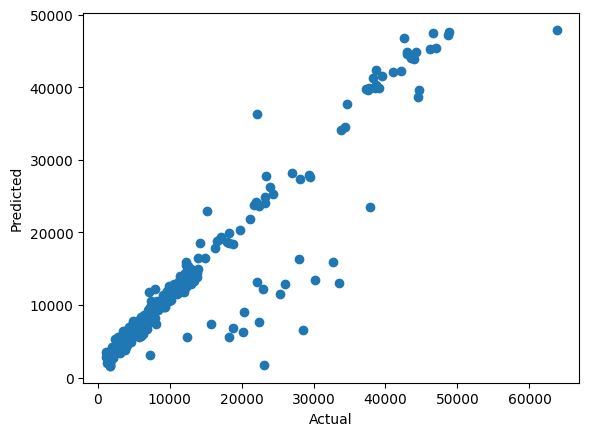

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='expenses'>

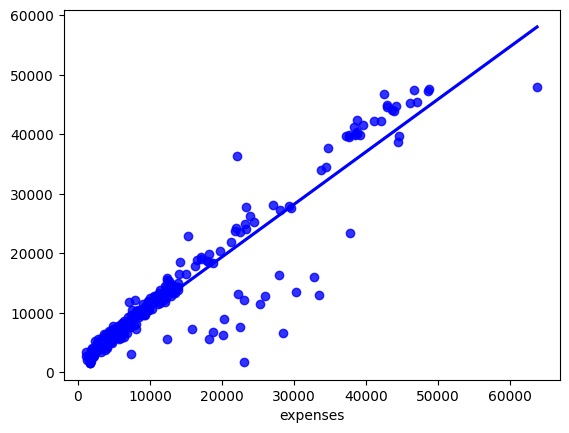

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue')

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.07,11421.671410,-2326.601410
887,5272.18,5808.630373,-536.450373
890,29330.98,27906.918316,1424.061684
1293,9301.89,9681.110446,-379.220446
259,33750.29,34047.020067,-296.730067
...,...,...,...
109,47055.53,45389.647025,1665.882975
575,12222.90,12538.666120,-315.766120
535,6067.13,6948.643263,-881.513263
543,63770.43,47891.158875,15879.271125
